# Project Overview

The CEO has asked us to analyze the companies sales data for last 4 year (2014-2017) and pull out some insights on how we can becom more profitable, her bonus depends on it!

To do this we will use plots to answer the following questions:

1.Which regions are showing top sales in the company and how have they changed over time?

2.Which product cateogries and segments are most important to overall sales?

3.Which regions are most profitable and which categories and segments are driving profitability?

In [47]:
#Load libraries and csv file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Sample - Superstore.csv')
#df.head()
#df.columns
#df.dtypes
#df.describe()

#Create year column as majority of analysis will use year as time period
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

#### Sales Analysis
1.How have sales trended for the company over the past 4 years?

2.Which Regions and Categories are influencing overall sales at the company?

3.How do sales and profit trend on a monthly basis throughout the year?

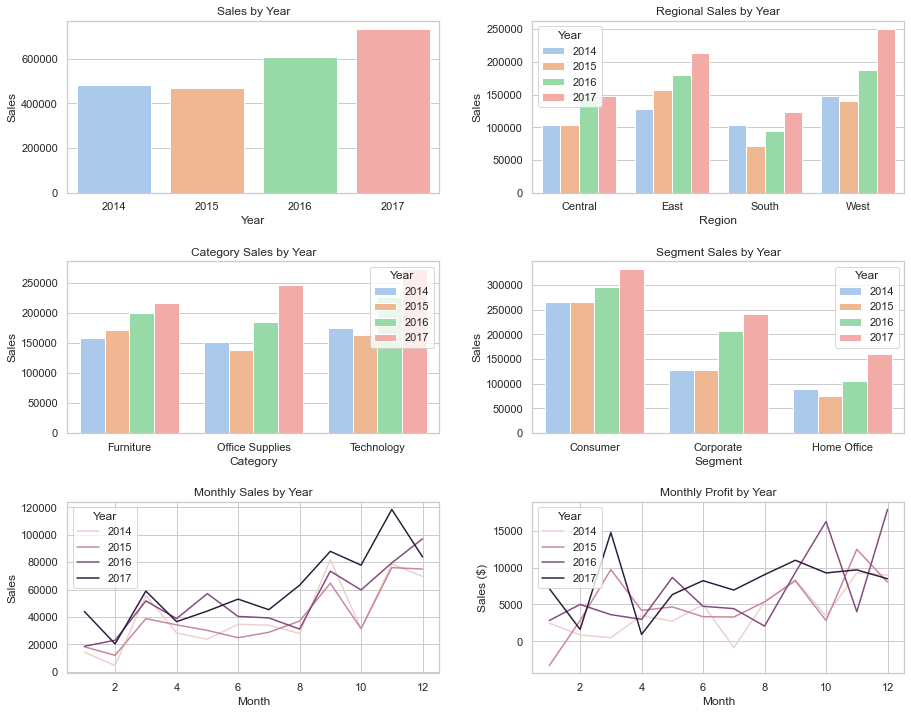

<Figure size 432x288 with 0 Axes>

In [48]:
#Plot sales by year and by region

yr_df = df.groupby(['Year'])['Sales'].sum().reset_index()
yr_region_df = df.groupby(['Year', 'Region'])['Sales'].sum().reset_index()
yr_cat_df = df.groupby(['Year', 'Category'])['Sales'].sum().reset_index()
yr_seg_df = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()
month_yr_df = df.groupby(['Month', 'Year'])['Sales'].sum().reset_index()
month_yr_profit_df = df.groupby(['Month', 'Year'])['Profit'].sum().reset_index()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.25)
sns.set_theme(style="whitegrid", palette="pastel")

sns.barplot(x="Year", y="Sales", data=yr_df, ci=None, ax=axes[0,0]).set(title='Sales by Year')
plt.xlabel('Years')
plt.ylabel('Sales ($)')

sns.barplot(x='Region', y='Sales', hue='Year', data=yr_region_df, ci=None, ax=axes[0,1]).set(title='Regional Sales by Year')
plt.xlabel('Region')
plt.ylabel('Sales ($)')

sns.barplot(x='Category', y='Sales', hue='Year', data=yr_cat_df, ci=None, ax=axes[1,0]).set(title='Category Sales by Year')
plt.xlabel('Catgeory')
plt.ylabel('Sales ($)')

sns.barplot(x='Segment', y='Sales', hue='Year', data=yr_seg_df, ci=None, ax=axes[1,1]).set(title='Segment Sales by Year')
plt.xlabel('Segment')
plt.ylabel('Sales ($)')

sns.lineplot(x='Month', y='Sales', hue='Year', data=month_yr_df, ci=None, ax=axes[2,0]).set(title='Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

sns.lineplot(x='Month', y='Profit', hue='Year', data=month_yr_profit_df, ci=None, ax=axes[2,1]).set(title='Monthly Profit by Year')
plt.xlabel('Month')
plt.ylabel('Sales ($)')

plt.savefig('superstore_sales_plots.png')
plt.show()
plt.clf()

#### Insights

1. Sales dipped slightly in 2015 vs but rose in 2016 vs 2015 and 2017 vs 2016.
2. Sales growth in 2016 and 2017 was driven by East and West regions. Sales dipp in 2015 was driven by South and the decline in Office Supplies and Technology.
3. Technology and Office Supplies were key drivers of sales growth in 2017 vs 2016. However Furniture has been a YoY growth category for the company since 2014.
4. Season sales pattern exists in all years with sales picking up in August and continue to increase until end of December.

#### Profitability Analysis
1.Which regions, segments and categories are most profitable?
2.What is the relationship between sales and profit between different regions, categories and segments

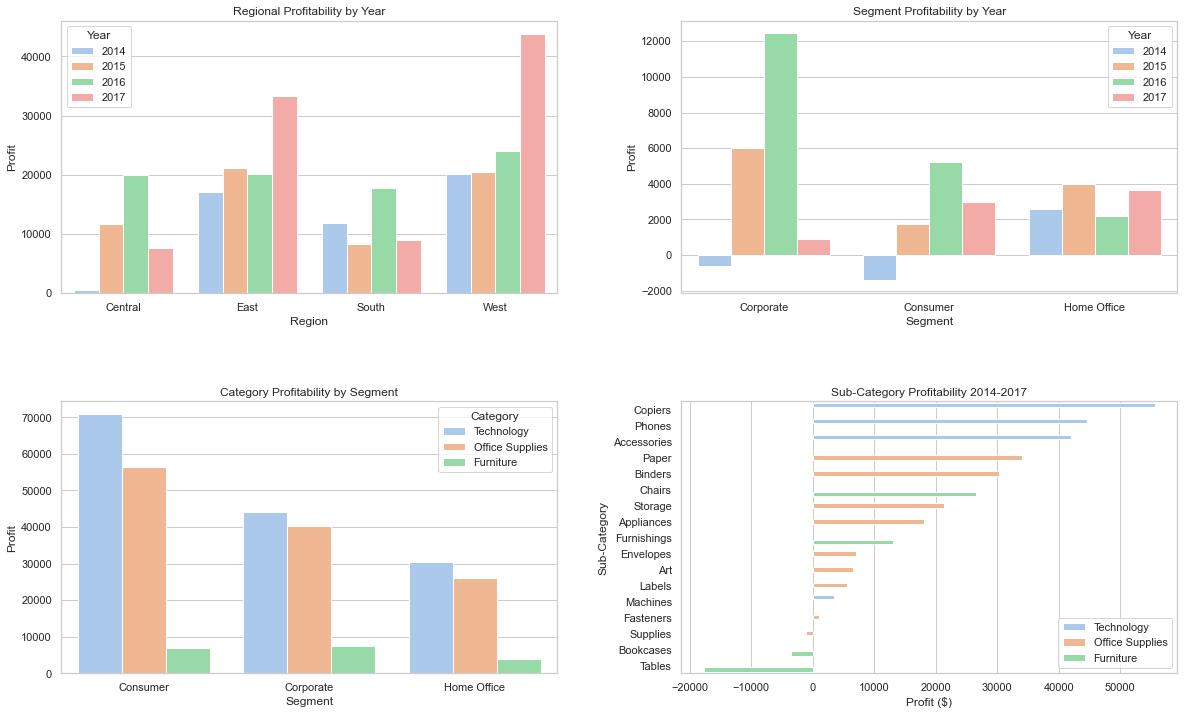

<Figure size 432x288 with 0 Axes>

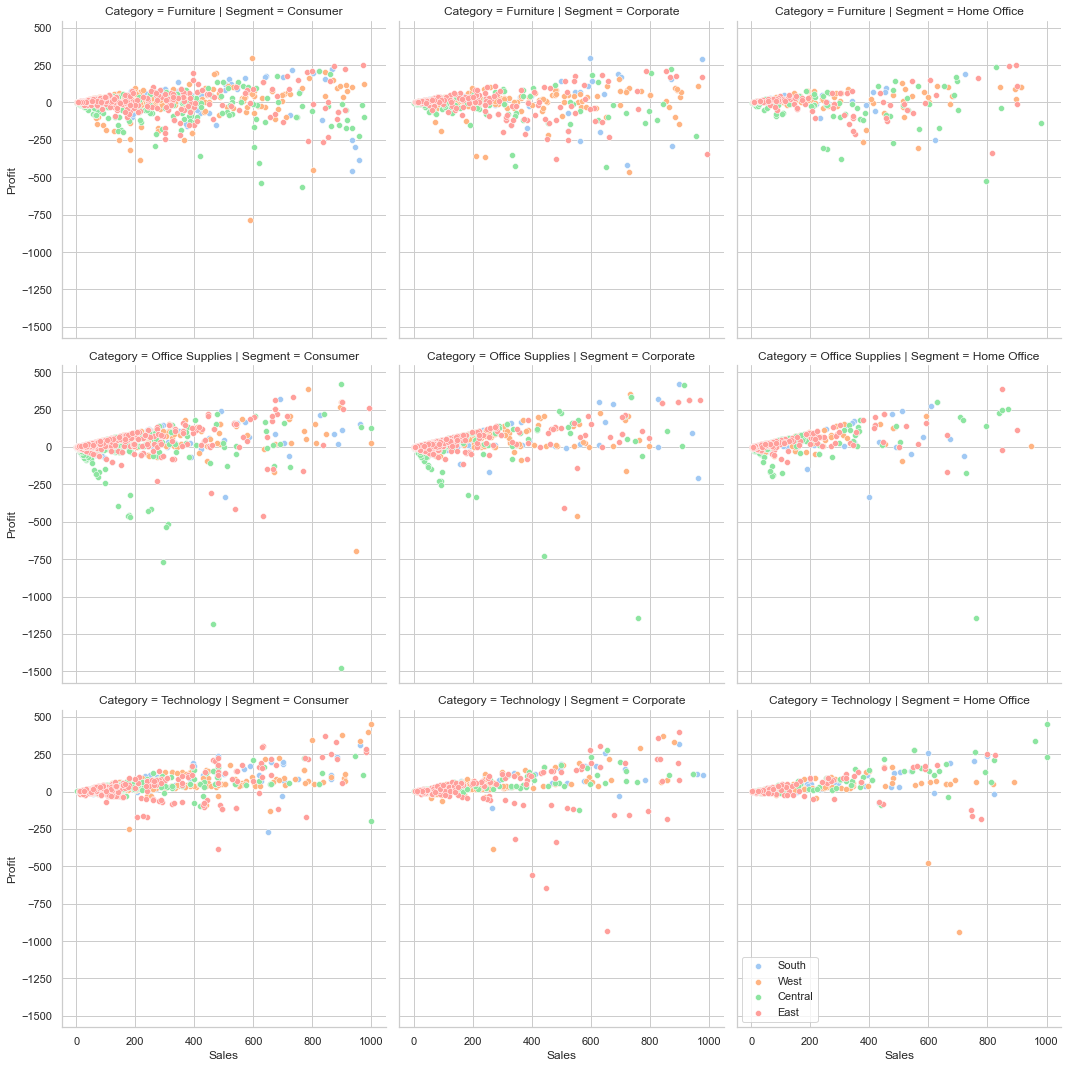

<Figure size 432x288 with 0 Axes>

In [53]:
#Create Regional profitability trend
yr_region_profit_df = df.groupby(['Year', 'Region'])['Profit'].sum().reset_index()

segment_cat_profit_df = df.groupby(['Segment', 'Category'])['Profit'].sum().reset_index().sort_values(by=['Profit'], ascending=False)
cat_subcat_profit_df = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index().sort_values(by=['Profit'], ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.25)

sns.barplot(x='Region', y='Profit', hue='Year', data=yr_region_profit_df, ci=None, ax=axes[0,0]).set(title='Regional Profitability by Year')
plt.xlabel('Region')
plt.ylabel('Profit ($)')

sns.barplot(x='Segment', y='Profit', hue='Year', data=yr_segment_profit_df, ci=None, ax=axes[0,1]).set(title='Segment Profitability by Year')
plt.xlabel('Region')
plt.ylabel('Profit ($)')

sns.barplot(x='Segment', y='Profit', hue='Category', data=segment_cat_profit_df, ci=None, ax=axes[1,0]).set(title='Category Profitability by Segment')
plt.xlabel('Region')
plt.ylabel('Profit ($)')

sns.barplot(y='Sub-Category', x='Profit', hue='Category', data=cat_subcat_profit_df, ci=None, ax=axes[1,1]).set(title='Sub-Category Profitability 2014-2017')
plt.xlabel('Profit ($)')
plt.ylabel('Sub-Category')
plt.legend(loc='lower right')

plt.savefig('superstore_profit_plots.png')
plt.show()
plt.clf()

g = sns.FacetGrid(df[df['Sales'] < 1000], col="Segment", row="Category", hue='Region', height=5)
g.map(sns.scatterplot, "Sales", "Profit")
plt.legend()

plt.savefig('superstore_profit_pair_plots.png')
plt.show()
plt.clf()

#### Insights

1. East and West regions were most profitable which is not surprsing given they had the most sales. South and Central regions were least profitable and saw their profitability decline in the 2017 vs 2016.
2. From a segment perspective the Consumer and Corporate segments are accounting for majority of profit, however corporate has declined in 2017 vs 2016. Home Office has grown the most on a percentage basis in 2017 vs 2016.
3. Furniture is the least profitable category within the company, with Tables and Bookcases leading the way. Technology is the key profitability driver with copiers, phones and accessories driving profitability for the category.
4. Our Sales and Profit grid higlights the above point more clearly for sales transactions under 1,000 dollars. We can see furtniture, particularly in the Consumer and Corporate segments where a large portion of all of these sales are not profitable. Home Office segment in the technological category appears to be very profitable on a per transaction basis, particularly in the Central region.

#### Central Region Profit Analysis

1.Review the profitability of the central region to determine what is driving profitability down in 2017 from 2016.

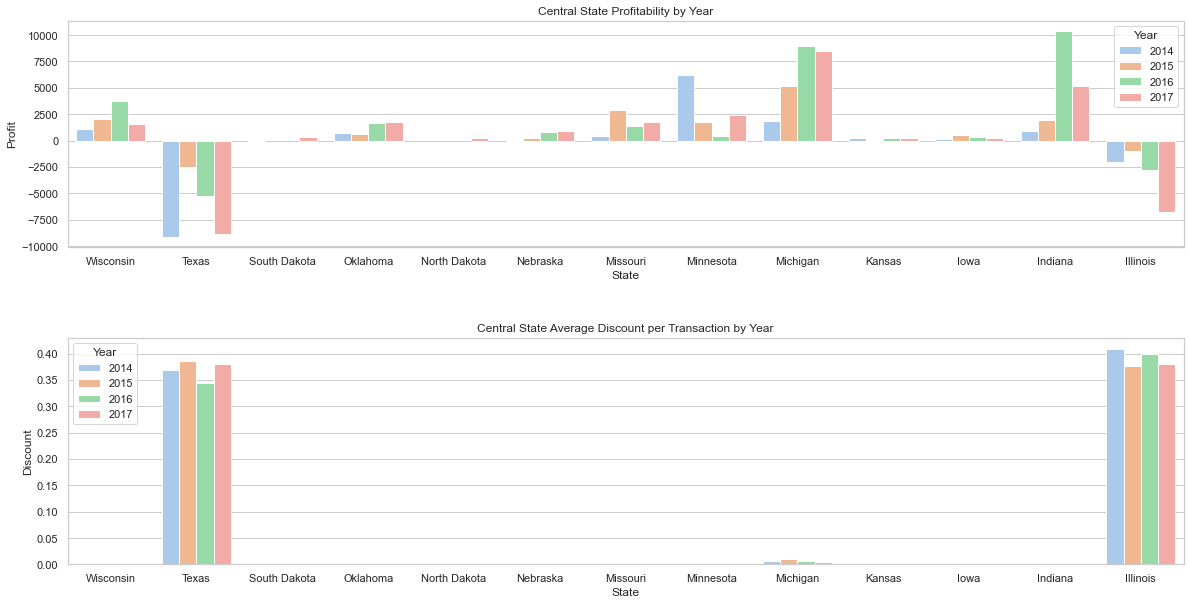

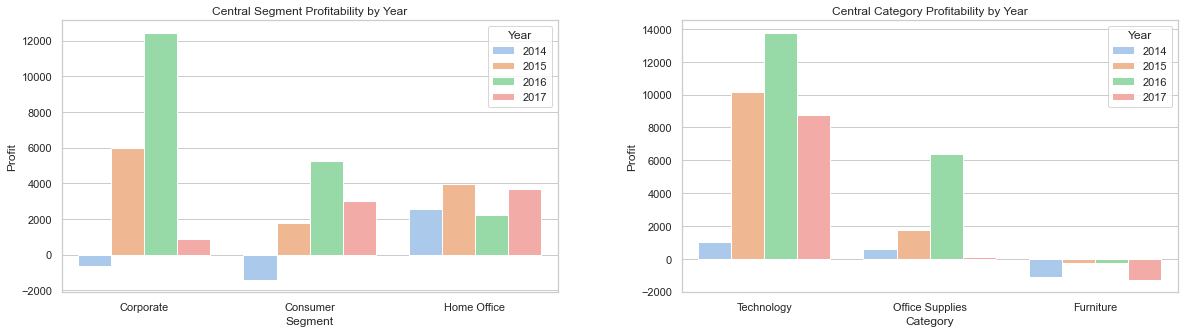

In [54]:
df_central = df[df['Region'] == 'Central']
yr_segment_profit_df = df_central.groupby(['Year', 'Segment'])['Profit'].sum().reset_index().sort_values(by=['Profit'], ascending=False)
yr_cat_profit_df = df_central.groupby(['Year', 'Category'])['Profit'].sum().reset_index().sort_values(by=['Profit'], ascending=False)
yr_state_profit_df = df_central.groupby(['Year', 'State'])['Profit'].sum().reset_index().sort_values(by=['State'], ascending=False)
yr_state_discount_df = df_central.groupby(['Year', 'State'])['Discount'].mean().reset_index().sort_values(by=['State'], ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.25)
sns.barplot(x='State', y='Profit', hue='Year', data=yr_state_profit_df, ci=None, ax=axes[0]).set(title='Central State Profitability by Year')
sns.barplot(x='State', y='Discount', hue='Year', data=yr_state_discount_df, ci=None, ax=axes[1]).set(title='Central State Average Discount per Transaction by Year')
plt.savefig('superstore_central_state_profit_plots.png')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.25)
sns.barplot(x='Segment', y='Profit', hue='Year', data=yr_segment_profit_df, ci=None, ax=axes[0]).set(title='Central Segment Profitability by Year')
sns.barplot(x='Category', y='Profit', hue='Year', data=yr_cat_profit_df, ci=None, ax=axes[1]).set(title='Central Category Profitability by Year')

plt.savefig('superstore_central_profit_plots.png')
plt.show()

#### Insights

1.Illinos and Texas have been unprofitable states for the last 4 years. These states also offer the deepest discounts, averaging around a 35% discount on all transactions in each of the last 4 years.
2.Froma segment perspective the reason for decline in proftiablity in the Central reason from 2016 to 2017 was a significant decline in the Corporate segments profitability.

#### CEO Recomendations

1.Shift focus of business to the technology category as this is fastest growing and most profitable category in your business. Also there appears to be a shift in sales moving from Corporate segment to the Home Office segment which may be signiling a trend in where employees are working. We should be monitoring this trend and shift our business if needed to focus on these customers.
2.Reduce level of discounting in Central region, particularly in Illinos and Texas where discounting is averaging 35% which is making it impossible to turn a profit. We may need to do further analysis to determine why we are discounting so much in these regions? Is it to hit sales targets? Competitoion in the area? 